## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import plotly.express as px

## Data Lookup & Cleaning

**Reading the Dataset and assigning that to the variable df**

In [2]:
df=pd.read_csv('tested.csv')

**Access the first 5 rows of a dataframe**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Access the last 5 rows of a dataframe**

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Prints information about the DataFrame**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Remove the unwanted columns**

In [6]:
df.drop(["PassengerId","Cabin","Ticket","Name"], inplace=True, axis=1)

**Check the number of missing values in each column**

In [7]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**Identify the numeric and categorical columns**

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer=SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [12]:
df[numeric_cols]=imputer.transform(df[numeric_cols])

**Check the number of missing values in each column**

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df.dtypes

Survived    float64
Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

**Replacing the value M to 0 and F to 1 in the Sex column**

In [15]:
df.Sex=df.Sex.replace({"male":0.0,"female":1.0})

**Replacing the value S to 0 , C to 1 and Q to 2 in the Embarked column**

In [16]:
df.Embarked=df.Embarked.replace({"S":0.0,"C":1.0,"Q":2.0})

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,34.5,0.0,0.0,7.8292,2.0
1,1.0,3.0,1.0,47.0,1.0,0.0,7.0000,0.0
2,0.0,2.0,0.0,62.0,0.0,0.0,9.6875,2.0
3,0.0,3.0,0.0,27.0,0.0,0.0,8.6625,0.0
4,1.0,3.0,1.0,22.0,1.0,1.0,12.2875,0.0


In [18]:
df.dtypes

Survived    float64
Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
dtype: object

## Analysis of Data

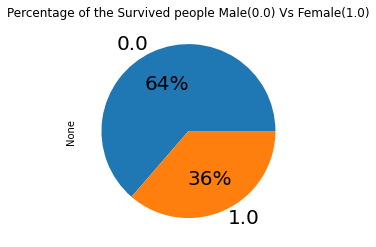

In [19]:
df.groupby('Sex').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the Survived people Male(0.0) Vs Female(1.0)')
plt.show()

### Observation
- 64% of the Male's were Survived in the Titanic
- 36% of the Female's were Survived in the Titanic

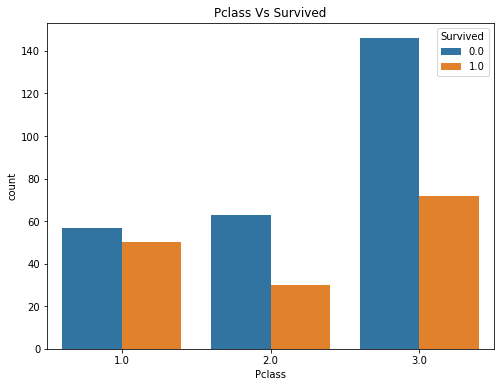

In [20]:
plt.figure(figsize=(8,6))
sns.countplot('Pclass', data=df, hue = 'Survived')

plt.title("Pclass Vs Survived")
plt.show()

### Observation
- Total No. of Survived Passengers count are higher in 3.0 (Pclass)

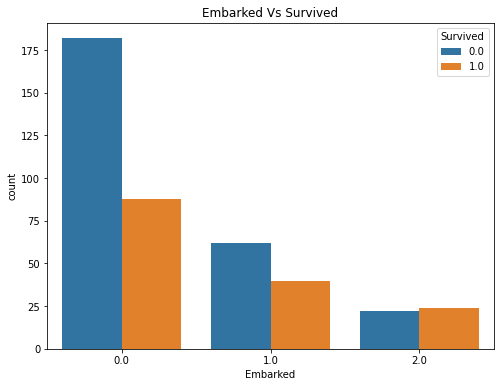

In [21]:
plt.figure(figsize=(8,6))
sns.countplot('Embarked', data=df, hue = 'Survived')

plt.title("Embarked Vs Survived")
plt.show()

### Observation
- Total No. of Survived Passengers count are higher in 0.0 (Embarked) - S (Southampton)

## Creation of a Model

**Take the X and y value**

In [22]:
X=df.drop('Survived',axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,0.0,34.50000,0.0,0.0,7.8292,2.0
1,3.0,1.0,47.00000,1.0,0.0,7.0000,0.0
2,2.0,0.0,62.00000,0.0,0.0,9.6875,2.0
3,3.0,0.0,27.00000,0.0,0.0,8.6625,0.0
4,3.0,1.0,22.00000,1.0,1.0,12.2875,0.0
...,...,...,...,...,...,...,...
413,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0
414,1.0,1.0,39.00000,0.0,0.0,108.9000,1.0
415,3.0,0.0,38.50000,0.0,0.0,7.2500,0.0
416,3.0,0.0,30.27259,0.0,0.0,8.0500,0.0


In [23]:
y=df.Survived
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 418, dtype: float64

In [24]:
y.value_counts()

0.0    266
1.0    152
Name: Survived, dtype: int64

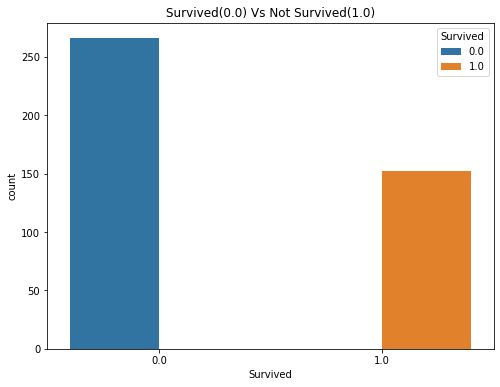

In [26]:
plt.figure(figsize=(8,6))
sns.countplot('Survived', data=df, hue = 'Survived')

plt.title("Survived(0.0) Vs Not Survived(1.0)")
plt.show()

**Import the train_test_split from the sklearn**

In [27]:
from sklearn.model_selection import train_test_split

**Split the Training Dataset and Test Dataset**

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model=RandomForestClassifier()

**Fitting the training data to the model**

In [31]:
model.fit(X,y)

RandomForestClassifier()

## Prediction

In [32]:
y_predict=model.predict(X_test)

In [33]:
y_predict

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.])

## Accuracy

**Import the accuracy_score from the sklearn**

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_predict)*100

100.0

## Confusion Matrix

**Import the confusion_matrix from the sklearn**

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
performance=confusion_matrix(y_test,y_predict)

In [38]:
performance

array([[55,  0],
       [ 0, 29]], dtype=int64)

**Import the plot_confusion_matrix from the sklearn**

In [39]:
from sklearn.metrics import plot_confusion_matrix

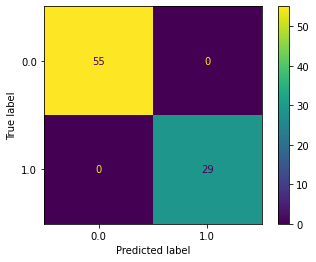

In [40]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

## Conclusion
* Overall Accuracy = **100%**